# Domain Knowledge
This dataset contains historical weather parameter of Dhaka

Source : **Bangladesh Meteorological Department**

There are 4 attribute in this data set out of which 3 are features and 1 class attribute as below. Also, there are 306 instances of data.

        1.YEAR- Observation year 
        2.Month- Month
        3.MaxTemp- Mean Maximum temprature per month (Unit-celsius)
        4.MinTemp- Mean Minimum temprature per month (Unit-celsius)
        4.RelativeHumidity- Mean RelativeHumidity per month (Unit-%)
        5.Rainfall- Total Rainfall per month (Unit-mm)
        

# What is EDA ?
 <img src="https://i.pinimg.com/originals/50/fe/70/50fe70af8f807866eec7c6a755da07b5.jpg">


# Our EDA Goals


1.   Invistigate the data 
2.   Investigate the null values
3.   Explore the descriptive statistics
4.   Exploring the relationship among variables
5.   Explore the priliminary insights for ML phase




In [0]:
#importing libraries
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import numpy as np

In [0]:
#reading dataset
#df = pd.read_csv('E:\ASDS\Python for DS\GPA.csv')

url='https://raw.githubusercontent.com/fazlyrabbi77/Climate-Science/master/Dhaka%20weather%201953-2016.csv'
df = pd.read_csv(url)

In [52]:
#Reading Data Head
df.head()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
0,1953,1,26.7,10.9,70,10.0
1,1953,2,33.6,14.7,65,2.0
2,1953,3,37.5,21.7,73,90.0
3,1953,4,37.7,23.4,69,90.0
4,1953,5,34.7,24.2,81,274.0


In [53]:
#Reading Data Tail
df.tail()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
763,2016,8,33.28,26.8,78,169.9
764,2016,9,32.87,26.6,82,138.5
765,2016,10,33.07,25.2,75,76.6
766,2016,11,29.60,20.2,73,24.1
767,2016,12,27.75,17.0,72,0.0


In [54]:
#Check Null
df.isnull().values.any()

False

In [55]:
#Showing Columns
df.columns

Index(['YEAR', 'Month', 'MaxTemp', 'MinTemp', 'RelativeHumidity', 'Rainfall'], dtype='object')

In [56]:
#Describing Data Set
df.describe()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,1984.500000,6.500000,33.438529,21.51875,75.207031,168.377214
std,18.484992,3.454302,2.964510,4.97461,8.593081,173.784463
min,1953.000000,1.000000,24.300000,9.50000,49.000000,0.000000
25%,1968.750000,3.750000,31.875000,17.15000,69.000000,13.000000
50%,1984.500000,6.500000,33.900000,23.70000,76.000000,121.000000
75%,2000.250000,9.250000,35.525000,25.80000,83.000000,273.250000
max,2016.000000,12.000000,40.800000,28.10000,90.000000,856.000000


In [57]:
#Data set Shape
df.shape

(768, 6)

In [58]:
#Data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
YEAR                768 non-null int64
Month               768 non-null int64
MaxTemp             768 non-null float64
MinTemp             768 non-null float64
RelativeHumidity    768 non-null int64
Rainfall            768 non-null float64
dtypes: float64(3), int64(3)
memory usage: 36.1 KB


In [59]:
#Dataset median
df.median()

YEAR                1984.5
Month                  6.5
MaxTemp               33.9
MinTemp               23.7
RelativeHumidity      76.0
Rainfall             121.0
dtype: float64

In [60]:
#Checking kurtosis
df.kurtosis()

YEAR               -1.200586
Month              -1.216889
MaxTemp            -0.242861
MinTemp            -0.970577
RelativeHumidity   -0.504702
Rainfall            0.739686
dtype: float64

In [13]:
#Checking skewness
df.skew()

YEAR                0.000000
Month               0.000000
MaxTemp            -0.534748
MinTemp            -0.691065
RelativeHumidity   -0.476990
Rainfall            1.083406
dtype: float64

In [61]:
#Checking correlation
df.corr()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
YEAR,1.000000,0.000000,0.044080,0.098500,-0.165042,-0.009006
Month,0.000000,1.000000,-0.134986,0.210387,0.481070,0.125966
MaxTemp,0.044080,-0.134986,1.000000,0.724186,0.097398,0.365135
MinTemp,0.098500,0.210387,0.724186,1.000000,0.624770,0.687317
RelativeHumidity,-0.165042,0.481070,0.097398,0.624770,1.000000,0.708577
Rainfall,-0.009006,0.125966,0.365135,0.687317,0.708577,1.000000


In [62]:
#Checking covariance
df.cov()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
YEAR,341.694915,0.000000,2.415522,9.057627,-26.215776,-28.931877
Month,0.000000,11.932203,-1.382301,3.615254,14.279661,75.618188
MaxTemp,2.415522,-1.382301,8.788322,10.679776,2.481152,188.112180
MinTemp,9.057627,3.615254,10.679776,24.746741,26.707195,594.192592
RelativeHumidity,-26.215776,14.279661,2.481152,26.707195,73.841046,1058.149704
Rainfall,-28.931877,75.618188,188.112180,594.192592,1058.149704,30201.039519


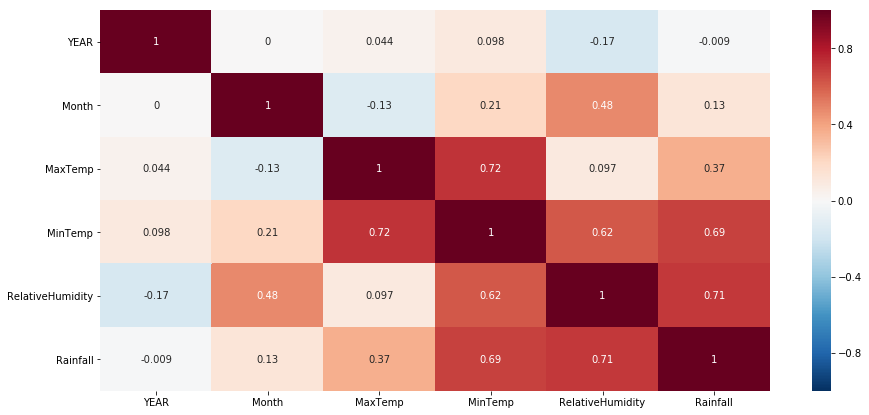

In [16]:
#Generating Heatmap
correlation = df.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

In [26]:
#month wise parameter checking
rain=df.groupby('Month')['Rainfall'].mean()
rain
#sns.distplot(rain)

Month
1       6.781250
2      19.703125
3      54.307812
4     126.431250
5     271.131250
6     360.075000
7     382.076563
8     313.971875
9     284.639063
10    164.120312
11     28.017187
12      9.271875
Name: Rainfall, dtype: float64

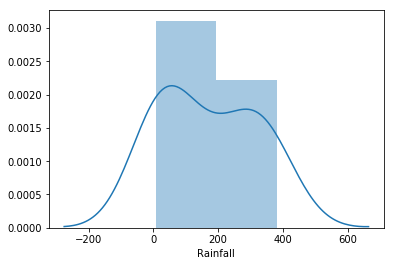

In [0]:
#month wise distribution
sns.distplot(rain)

In [21]:
# Finding out most rainy months
df.groupby('Month')['Rainfall'].mean().sort_values(ascending=False)


Month
7     382.076563
6     360.075000
8     313.971875
9     284.639063
5     271.131250
10    164.120312
4     126.431250
3      54.307812
11     28.017187
2      19.703125
12      9.271875
1       6.781250
Name: Rainfall, dtype: float64

In [0]:
#month wise parameter checking
mxt=df.groupby('Month')['MaxTemp'].mean()
mxt


Month
1     28.305312
2     31.980000
3     36.103281
4     36.922656
5     36.211875
6     35.088594
7     33.766250
8     34.109219
9     34.450469
10    33.815000
11    31.775469
12    28.734219
Name: MaxTemp, dtype: float64

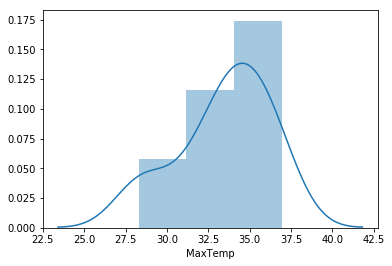

In [0]:
#month wise distribution
sns.distplot(mxt)

In [22]:
# Finding out most MaxTemp months
df.groupby('Month')['MaxTemp'].mean().sort_values(ascending=False)

Month
4     36.922656
5     36.211875
3     36.103281
6     35.088594
9     34.450469
8     34.109219
10    33.815000
7     33.766250
2     31.980000
11    31.775469
12    28.734219
1     28.305312
Name: MaxTemp, dtype: float64

In [0]:
#month wise parameter checking
mt=df.groupby('Month')['MinTemp'].mean()
mt

Month
1     12.548438
2     15.526562
3     20.400000
4     23.737500
5     24.803125
6     26.035938
7     26.217188
8     26.257813
9     25.910937
10    23.804687
11    18.815625
12    14.167187
Name: MinTemp, dtype: float64

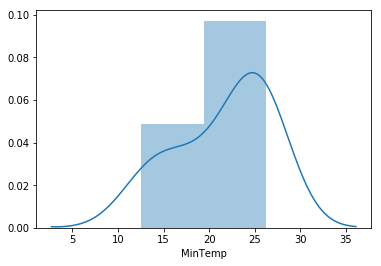

In [0]:
#month wise distribution
sns.distplot(mt)

In [24]:
# Finding out most MaxTemp months
df.groupby('Month')['MinTemp'].mean().sort_values(ascending=True)

Month
1     12.548438
12    14.167187
2     15.526562
11    18.815625
3     20.400000
4     23.737500
10    23.804687
5     24.803125
9     25.910937
6     26.035938
7     26.217188
8     26.257813
Name: MinTemp, dtype: float64

In [0]:
#month wise parameter checking
hm=df.groupby('Month')['RelativeHumidity'].mean()
hm

Month
1     69.828125
2     62.968750
3     61.156250
4     70.218750
5     77.171875
6     83.562500
7     84.640625
8     83.781250
9     83.562500
10    79.296875
11    73.390625
12    72.906250
Name: RelativeHumidity, dtype: float64

In [25]:
# Finding out most MaxTemp months
df.groupby('Month')['RelativeHumidity'].mean().sort_values(ascending=False)

Month
7     84.640625
8     83.781250
9     83.562500
6     83.562500
10    79.296875
5     77.171875
11    73.390625
12    72.906250
4     70.218750
1     69.828125
2     62.968750
3     61.156250
Name: RelativeHumidity, dtype: float64

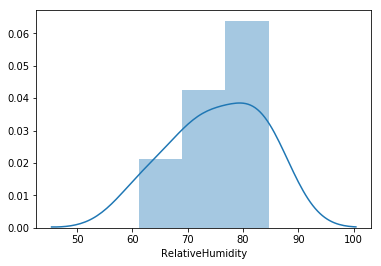

In [0]:
#month wise distribution
sns.distplot(hm)

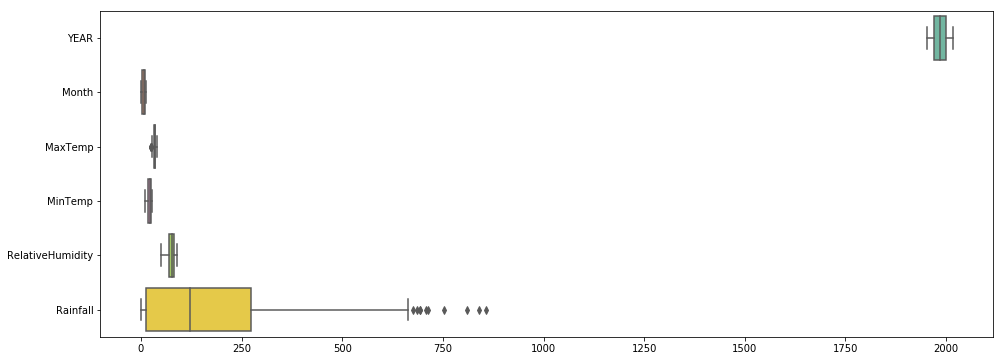

In [0]:
#Visualizing Boxplot
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

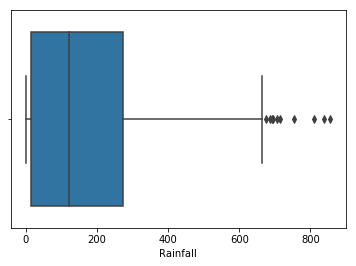

In [0]:
ax = sns.boxplot(x=df["Rainfall"])

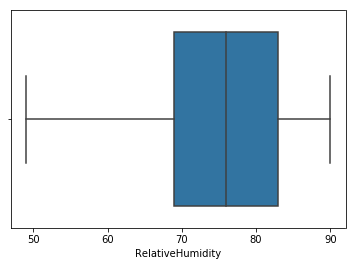

In [0]:
ax = sns.boxplot(x=df["RelativeHumidity"])

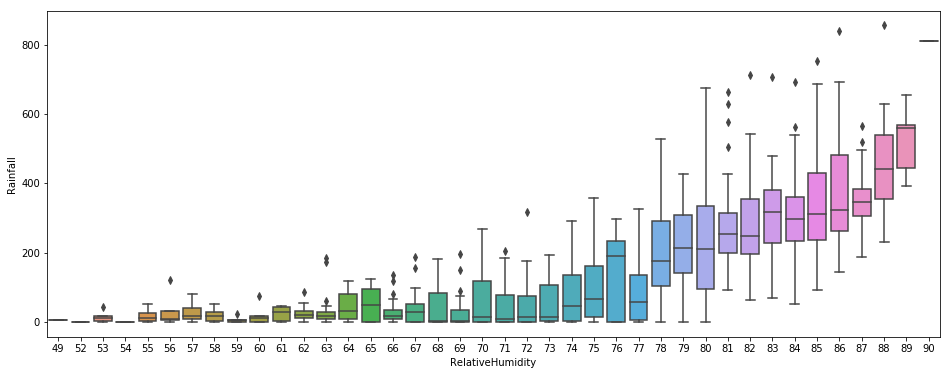

In [0]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="RelativeHumidity", y="Rainfall", data=df)

<Figure size 1152x432 with 0 Axes>

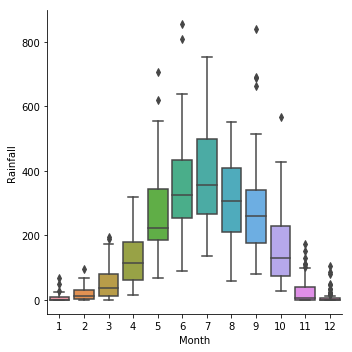

In [0]:
plt.figure(figsize=(16, 6))
ax=sns.catplot(x="Month", y="Rainfall", kind="box", data=df);

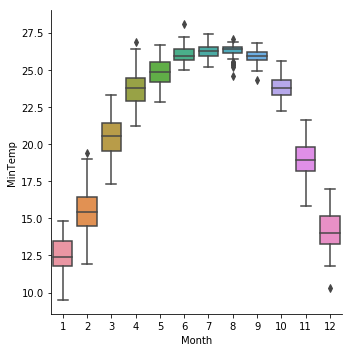

In [0]:

ax=sns.catplot(x="Month", y="MinTemp", kind="box", data=df);

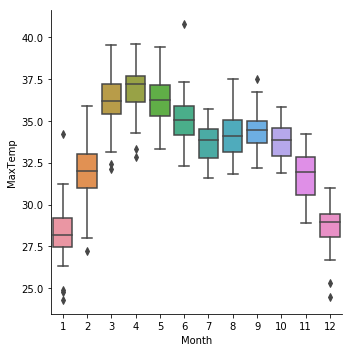

In [0]:
ax=sns.catplot(x="Month", y="MaxTemp", kind="box", data=df);

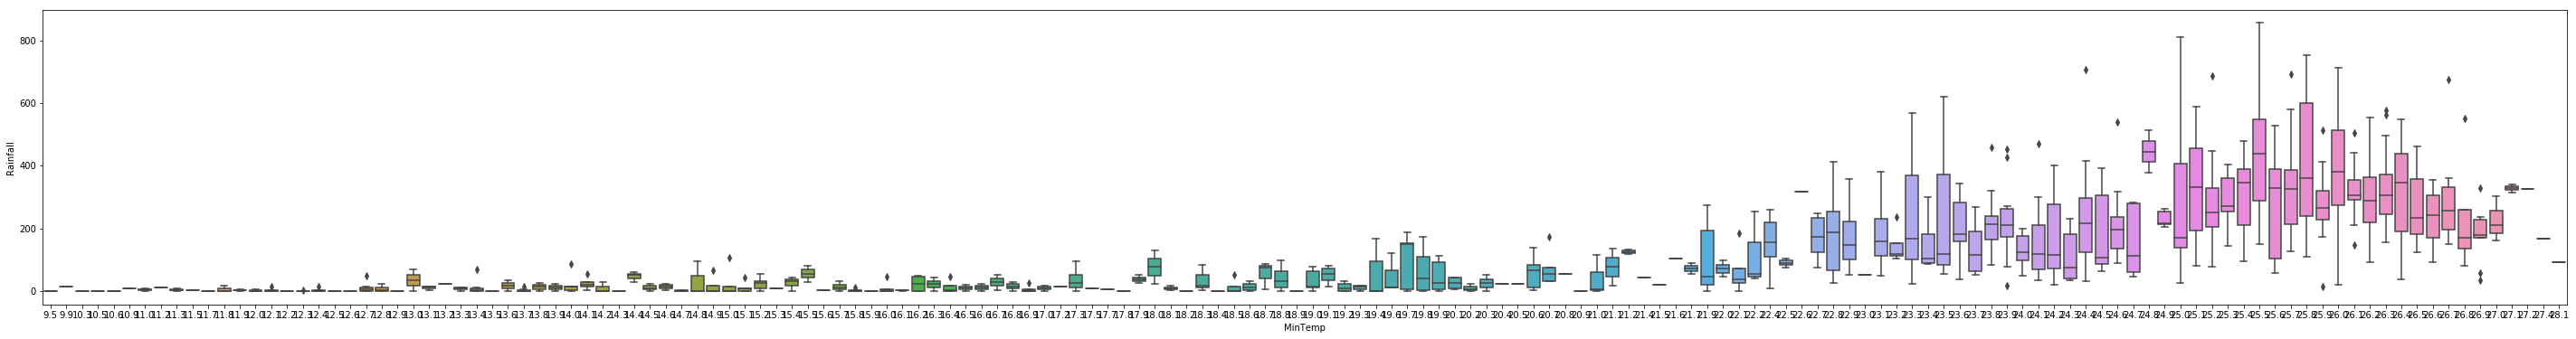

In [0]:
plt.figure(figsize=(50, 6))
ax = sns.boxplot(x="MinTemp", y="Rainfall", data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81ff6c54a8>,
      dtype=object)

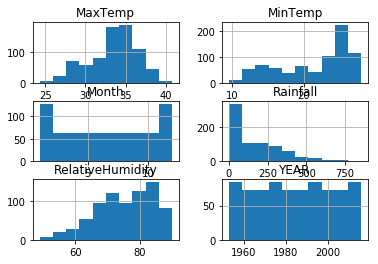

In [0]:

df.hist()

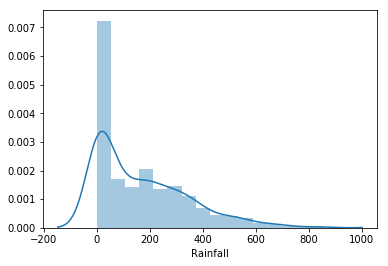

In [0]:
#Distribution Plot
sns.distplot(df['Rainfall'])

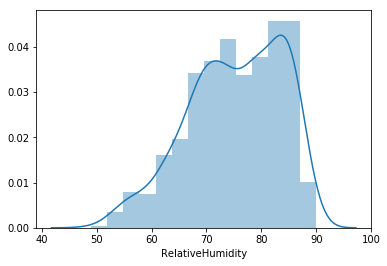

In [0]:
#Distribution Plot
sns.distplot(df['RelativeHumidity'])

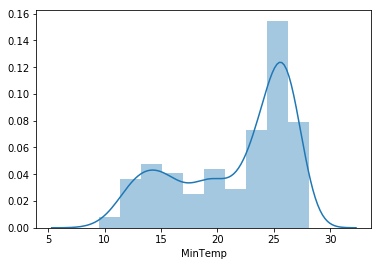

In [0]:
#Distribution Plot
sns.distplot(df['MinTemp'])

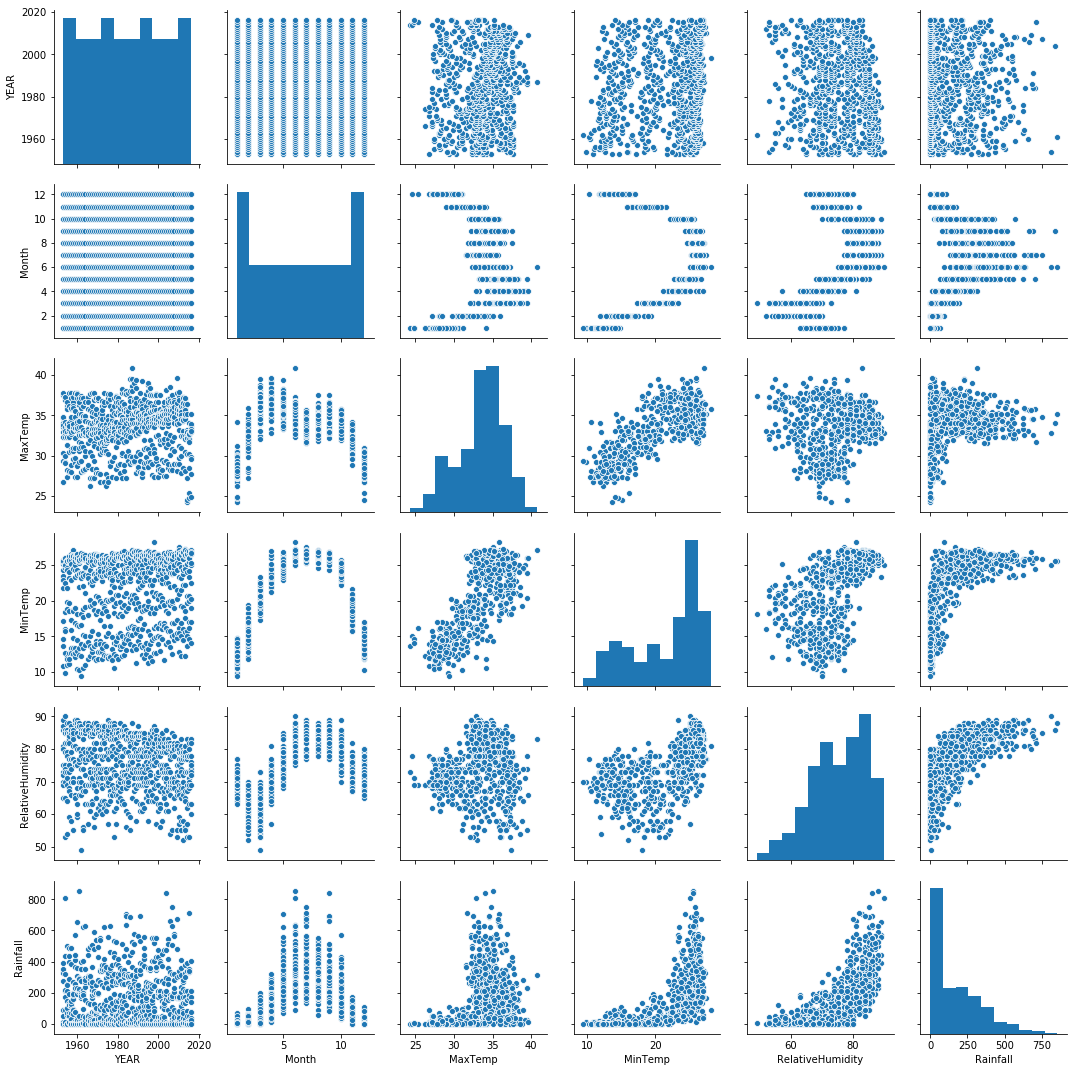

In [0]:
#Drawing Pairplot
sns.pairplot(df);

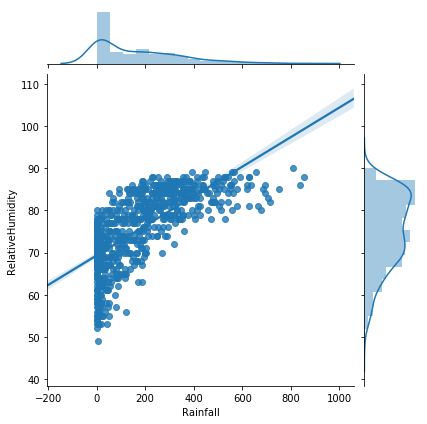

In [0]:
sns.jointplot(x="Rainfall", y="RelativeHumidity", data=df, kind="reg");

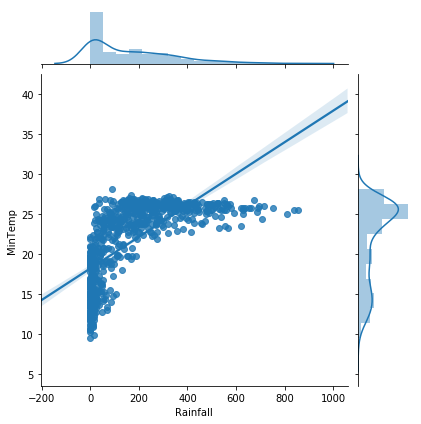

In [0]:
sns.jointplot(x="Rainfall", y="MinTemp", data=df, kind="reg");

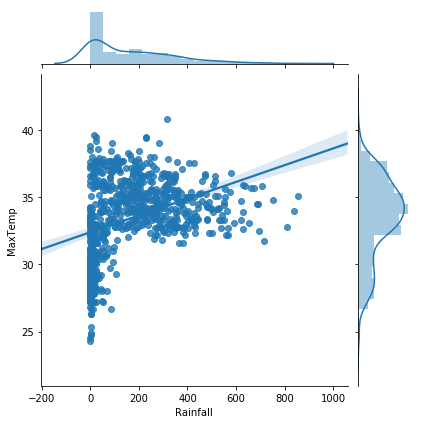

In [0]:
sns.jointplot(x="Rainfall", y="MaxTemp", data=df, kind="reg");

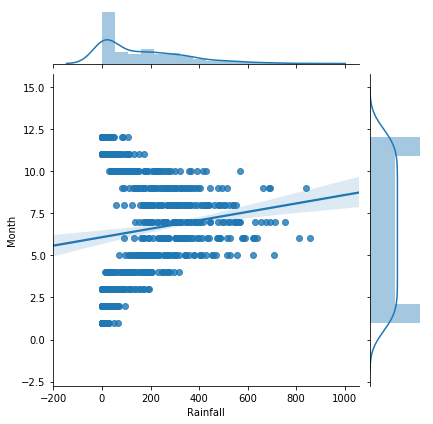

In [0]:
sns.jointplot(x="Rainfall", y="Month", data=df, kind="reg");

In [63]:
df.head()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
0,1953,1,26.7,10.9,70,10.0
1,1953,2,33.6,14.7,65,2.0
2,1953,3,37.5,21.7,73,90.0
3,1953,4,37.7,23.4,69,90.0
4,1953,5,34.7,24.2,81,274.0


In [0]:
#converting int to string
df['YAER1'] = df.YEAR.astype(str)
df['MONTH1'] = df.Month.astype(str)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
YEAR                768 non-null int64
Month               768 non-null int64
MaxTemp             768 non-null float64
MinTemp             768 non-null float64
RelativeHumidity    768 non-null int64
Rainfall            768 non-null float64
YAER1               768 non-null object
MONTH1              768 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 48.1+ KB


In [0]:
#Creating new columns for time series plot
df['DateStamp'] = df['YAER1'] +'-'+ df['MONTH1']+'-30'

In [0]:
df1=df

In [0]:
#Setting DateStamp as index
df1=df1.set_index("DateStamp", inplace = True) 

In [132]:
df.head(3)

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall,YAER1,MONTH1
DateStamp,,,,,,,,
1953-1-30,1953,1,26.7,10.9,70,10.0,1953,1
1953-2-30,1953,2,33.6,14.7,65,2.0,1953,2
1953-3-30,1953,3,37.5,21.7,73,90.0,1953,3


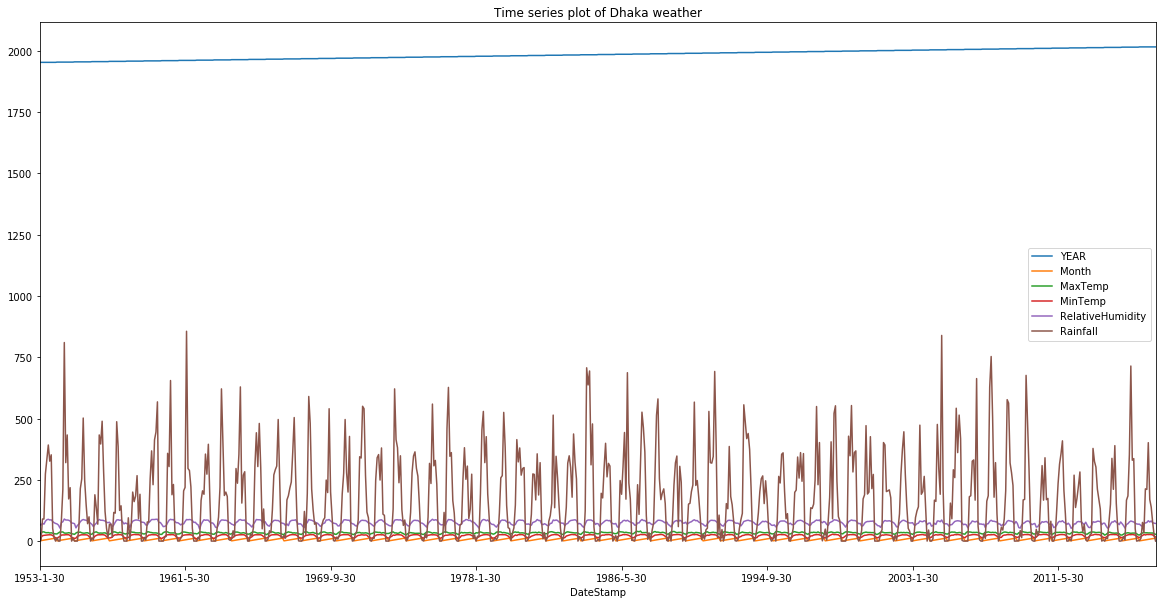

In [182]:
#Overall TS plot using matplotlib
import matplotlib.pyplot as plt

df.plot(figsize=(20,10))
plt.title("Time series plot of Dhaka weather")
plt.show()

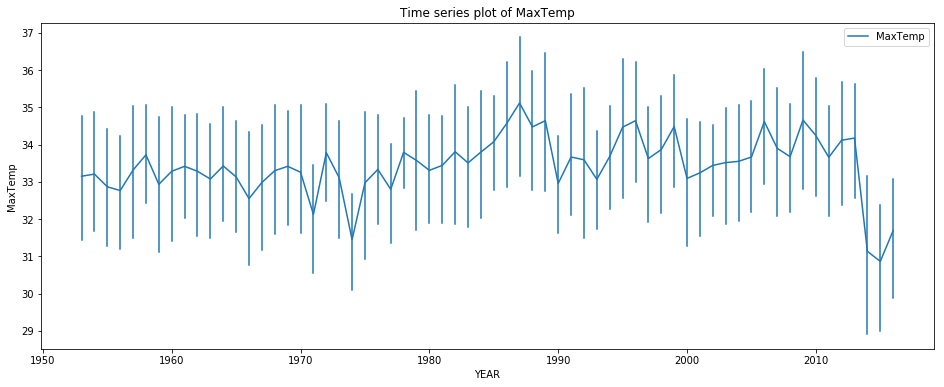

In [154]:
#MaxTemp TS plot using sns
plt.figure(figsize=(16, 6))
plt.title('Time series plot of MaxTemp')
ax = sns.lineplot(x="YEAR", y="MaxTemp",err_style="bars",label="MaxTemp", ci=95,data=df)

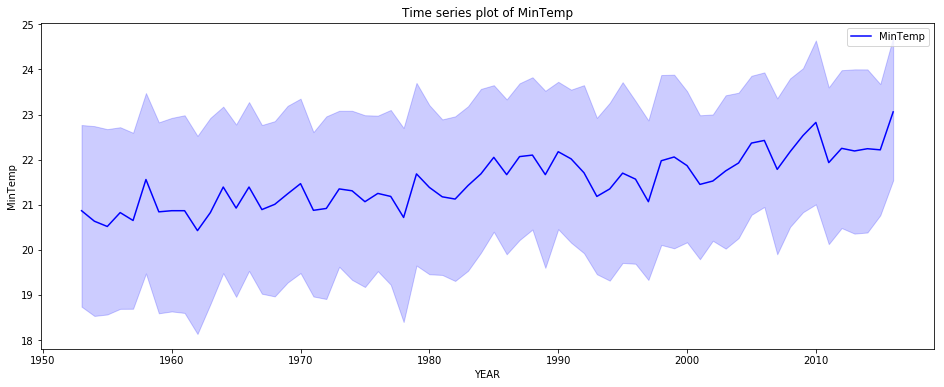

In [150]:
#MinTemp TS plot using sns
plt.figure(figsize=(16, 6))
plt.title('Time series plot of MinTemp')
ax = sns.lineplot(x="YEAR", y="MinTemp",ci=80,color="blue", label="MinTemp",data=df)

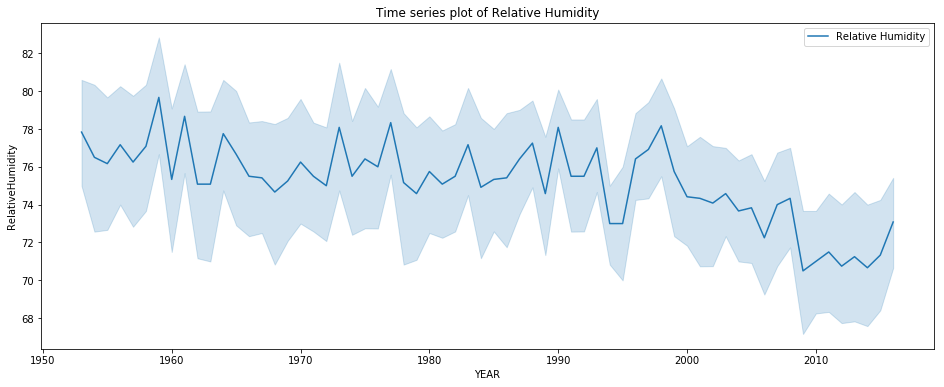

In [151]:
#Relative HumidityTS plot using sns
plt.figure(figsize=(16, 6))
plt.title('Time series plot of Relative Humidity')
ax = sns.lineplot(x="YEAR", y="RelativeHumidity",label="Relative Humidity",ci=80,data=df)

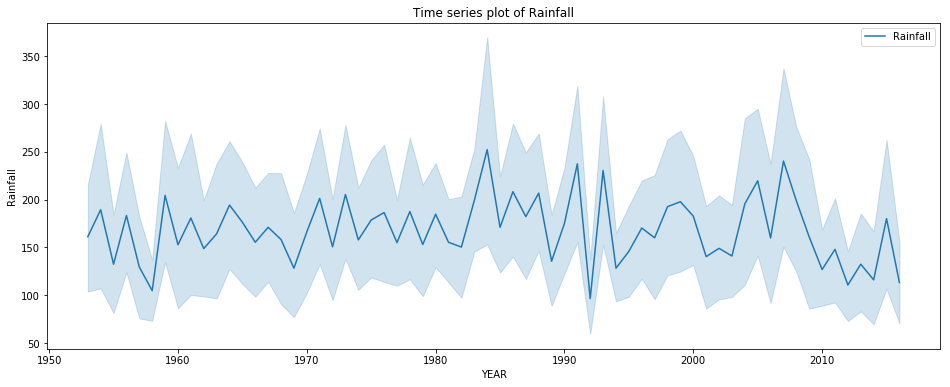

In [155]:
#Relative HumidityTS plot using sns
plt.figure(figsize=(16, 6))
plt.title('Time series plot of Rainfall')
ax = sns.lineplot(x="YEAR", y="Rainfall",label="Rainfall",ci=80,data=df)

In [195]:
#Yearly Min Temp Change
min=df.groupby('YEAR')['MinTemp'].mean()
min

YEAR
1953    20.866667
1954    20.633333
1955    20.516667
1956    20.825000
1957    20.650000
1958    21.558333
1959    20.841667
1960    20.866667
1961    20.866667
1962    20.425000
1963    20.825000
1964    21.391667
1965    20.925000
1966    21.391667
1967    20.891667
1968    21.008333
1969    21.241667
1970    21.466667
1971    20.875000
1972    20.916667
1973    21.350000
1974    21.308333
1975    21.066667
1976    21.250000
1977    21.183333
1978    20.716667
1979    21.683333
1980    21.383333
1981    21.175000
1982    21.125000
          ...    
1987    22.066667
1988    22.100000
1989    21.666667
1990    22.175000
1991    22.016667
1992    21.708333
1993    21.183333
1994    21.350000
1995    21.700000
1996    21.566667
1997    21.066667
1998    21.975000
1999    22.058333
2000    21.866667
2001    21.450000
2002    21.525000
2003    21.750000
2004    21.925000
2005    22.366667
2006    22.425000
2007    21.783333
2008    22.175000
2009    22.533333
2010    22.825000
2011 

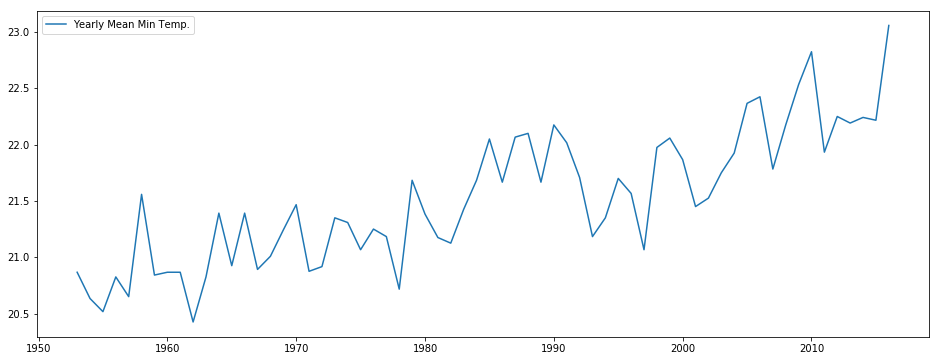

In [198]:
#Yearly Min Temp Change plot
plt.figure(figsize=(16, 6))
ax = sns.lineplot( label="Yearly Mean Min Temp.",data=min)

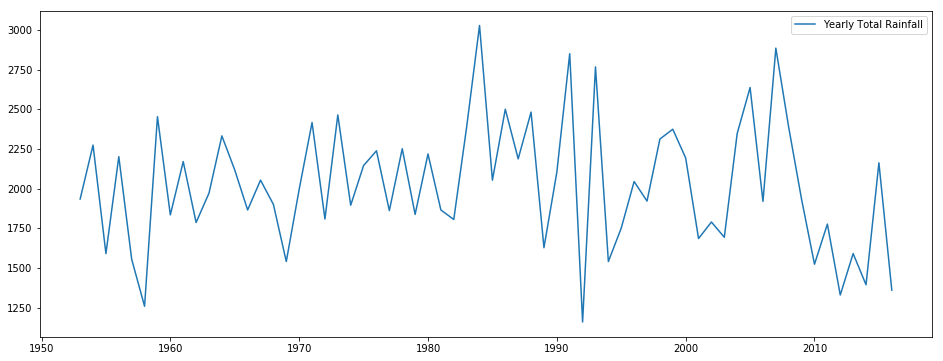

In [203]:
#Yearly Min Temp Change
rainfall=df.groupby('YEAR')['Rainfall'].sum()
plt.figure(figsize=(16, 6))
ax = sns.lineplot( label="Yearly Total Rainfall",data=rainfall)

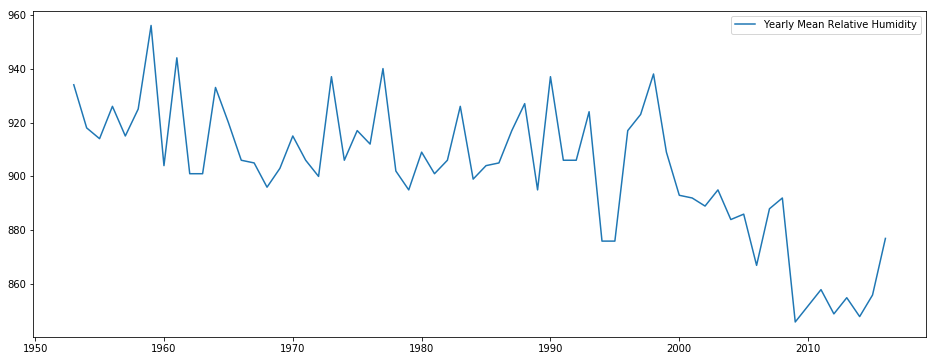

In [204]:
#Yearly Min Temp Change
rh=df.groupby('YEAR')['RelativeHumidity'].sum()
plt.figure(figsize=(16, 6))
ax = sns.lineplot( label="Yearly Mean Relative Humidity",data=rh)

# Findings from EDA



1. Data set has no null values
2. Data set is needed to be normalized
3. Rainfall contains most extreme values
4. Jun, July and August are most Rainy Months
5. April, May, Jun and July are most Max Temprature Months
6. December, January and February are most Min Temprature Months
7. Jun, July and August has Highly Relative Humidity
8. Rainfall & Humidity are highly Correlated
9. Minimum Temprature has 2nd highest correlation with Rainfall
10. Relative humidity has a down trend over the time
10. MinTemp has a up trend over the time
11. Rainfall has Seasonality






